<a href="https://colab.research.google.com/github/ZeynepRuveyda/OpenCV_Documentation/blob/main/Binary_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">Thresholding</font>

In many computer vision tasks, we need to process a binary image. 

A binary image consists of pixels that are either completely black ( pixel value 0 ) or completely white ( pixel value 255 ). It is easier to come up with algorithms which work on binary images. One of the easiest ways of creating Binary images from grayscale images is using **Thresholding**.

# <font style="color:rgb(50,120,229)">Import Libraries </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/My Drive/OpenCV_Documentation/week3/data/'

In [ ]:
import cv2, time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Load Image and display </font>

In [ ]:
# Read an image in grayscale
imagePath = DATA_PATH + '/images/threshold.png'
src = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

# Set threshold and maximum value
thresh = 100
maxValue = 255

Till now we have looked at operations on image as a whole or a range of pixels. 
Let us see how to do pixel wise operations on images using thresholding as an example.

# <font style="color:rgb(50,120,229)">Thresholding using for loops</font>
We had seen the pseudo code for Binary Thresholding in the previous video. Let us implement the same.

We have written a function which contains the code for thresholding. The function takes three arguments which we discussed in the video. The output is a thresholded image.

We also compute the time taken by the thresholding operation using the time module.

Time taken = 0.945324182510376 seconds


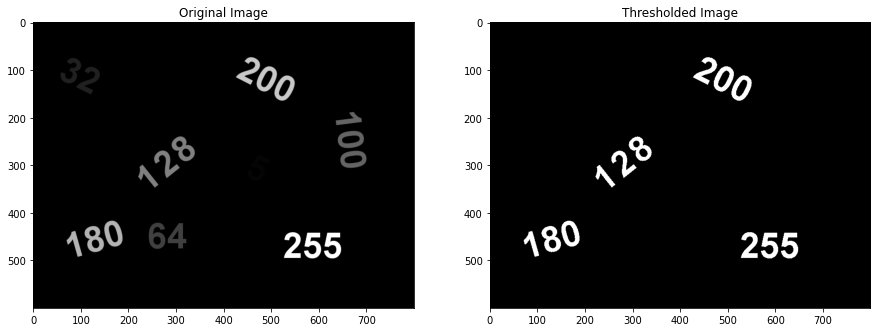

In [ ]:
def thresholdUsingLoop(src, thresh, maxValue):
    # Create a output image
    dst = src.copy()
    height,width = src.shape[:2]

    # Loop over rows
    for i in range(height):
        # Loop over columns
        for j in range(width):
            if src[i,j] > thresh:
                dst[i,j] = maxValue
            else:
                dst[i,j] = 0
                
    return dst

t = time.time()
dst = thresholdUsingLoop(src, thresh, maxValue)
print("Time taken = {} seconds".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

We can se that the output is as expected. But the time taken by the operation is huge. It should not take ~1 second to perform such a simple operation on an image.

We will see how to improve the execution time in the next unit using numpy operations.

# <font style="color:rgb(50,120,229)">Thresholding using Vectorized operations</font>
In the previous unit, we saw that the thresholding operation took a long time to execute. This is because we were using for loops which is a very inefficient way of handling arrays in python. 

To make the code more efficient, We should use vectorized computation available in numpy. Specifically, we can compare the whole image with the threshold instead of comparing each pixel, thanks to Numpy. Please read about [**numpy array programming**](https://realpython.com/numpy-array-programming/).

Time taken = 0.0007672309875488281 seconds


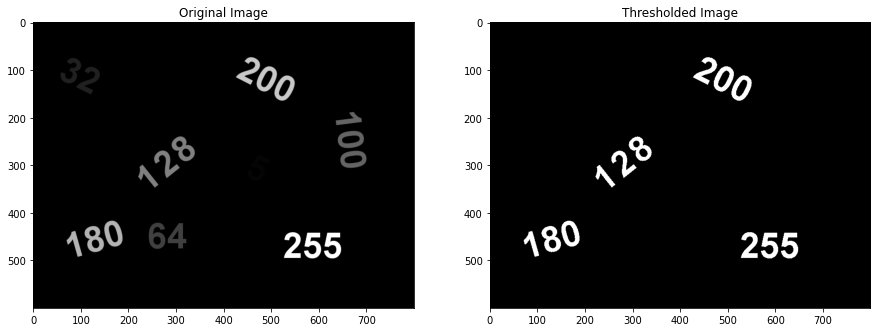

In [ ]:
def thresholdUsingVectors(src, thresh, maxValue):
    # Create a black output image ( all zeros )
    dst = np.zeros_like(src)
    
    # Find pixels which have values>threshold value
    thresholdedPixels = src>thresh
    
    # Assign those pixels maxValue
    dst[thresholdedPixels] = maxValue
    
    return dst

t = time.time()
dst = thresholdUsingVectors(src, thresh, maxValue)
print("Time taken = {} seconds".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

As you can see the code is much shorter and way more efficient than the one which uses for loops.

You might be wondering, whether you have to write every algorithm from scratch? The answer is 'NO' for most standard algorithms. OpenCV has many algorthms implemented in a very optimized way which one can use in their projects. Thresholding is one such example where we can simply use an OpenCV function and not worry about the implementation correctness and efficiency. We will see how to do it in the next unit.

# <font style="color:rgb(50,120,229)">Thresholding using OpenCV function</font>
We discussed about using loops and vector operations for performing thresholding in the previous units. Let us see how we can use the OpenCV function `cv2.threshold` to perform thresholding and then we'll also discuss whether we should use OpenCV functions or write our own functions.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

[**cv2.threshold**](https://docs.opencv.org/4.1.0/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) has the following syntax : 

`
retval, dst = cv.threshold(src, thresh, maxval, type[, dst])
`

Where,

Input:
- `src` is the input array ot image (multiple-channel, 8-bit or 32-bit floating point).
- `thresh` is the threshold value.
- `maxval` is the maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
- `type` is thethresholding type ( THRESH_BINARY, THRESH_BINARY_INV, etc )

Output:
- `dst` is the output array or image of the same size and type and the same number of channels as src.
- `retval`  is the threshold value if you use other thresholding types such as Otsu or Triangle 


Time taken = 0.013017892837524414 seconds


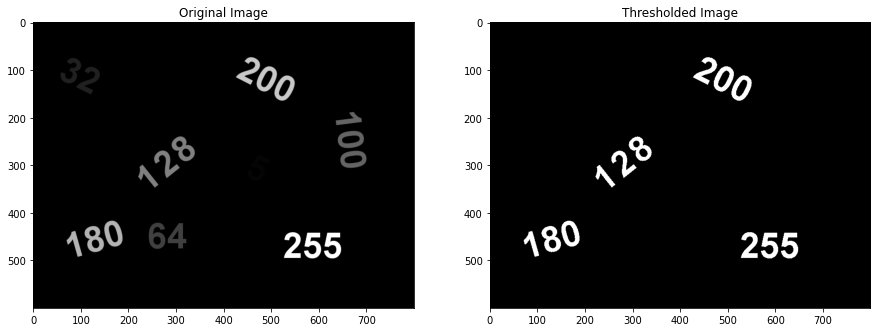

In [ ]:
t = time.time()
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
print("Time taken = {} seconds".format(time.time() - t))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(src);plt.title("Original Image");
plt.subplot(122);plt.imshow(dst);plt.title("Thresholded Image");

## <font style="color:rgb(50,120,229)">Comparison of runtimes for OpenCV function vs our implementation </font>
Let us compare the three implementations we discussed so far for thresholding operation with respect to the execution time.

In [ ]:
time_opencv = 0
time_loops = 0
time_vector = 0
n_samples = 10
for i in range(n_samples):
    
    t = time.time()
    dst = thresholdUsingLoop(src, thresh, maxValue)
    time_loops += time.time() - t
    
    t = time.time()
    dst = thresholdUsingVectors(src, thresh, maxValue)
    time_vector += time.time() - t
    
    t = time.time()
    th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
    time_opencv += time.time() - t

print("Average time taken by For Loop Code = {} seconds".format(time_loops/n_samples))
print("Average time taken by Vectorized Code = {} seconds".format(time_vector/n_samples))
print("Average time taken by OpenCV Code = {} seconds".format(time_opencv/n_samples))

Average time taken by For Loop Code = 0.928153681755066 seconds
Average time taken by Vectorized Code = 0.0006767988204956054 seconds
Average time taken by OpenCV Code = 0.0006599664688110351 seconds


Clearly, we can see that the vectorized code is much better than the code that uses loops. 

The OpenCV function is even faster than the one we wrote using numpy.

This is because they have written highly optimized code and made further optimizations based on the system architectre and Operating system you are using. It is highly recommeneded to use OpenCV functions instead of writing your own algorithm from scratch if it is already available in OpenCV. 

## <font style="color:rgb(250,0,0)">Warning </font>
#### <font style="color:rgb(200,0,0)">Never use for loops in python code unless absolutely neessary </font>

# <font style="color:rgb(50,120,229)">Other Thresholding types </font>
We have already discussed the pseudo code of the other thresholding algorithms in the video. In this unit, we will discuss in brief about how to use the code for the other types of thresholding.

In [ ]:
thresh = 100
maxValue = 150

## <font style="color:rgb(50,120,229)">Binary Thresholding </font>

In [ ]:
th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)

## <font style="color:rgb(50,120,229)">Inverse Binary Thresholding </font>

In [ ]:
th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)

## <font style="color:rgb(50,120,229)">Truncate Thresholding </font>

In [ ]:
th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)

## <font style="color:rgb(50,120,229)">Threshold to Zero </font>

In [ ]:
th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)

## <font style="color:rgb(50,120,229)">Inverted Threshold to Zero</font>

In [ ]:
th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)

## <font style="color:rgb(50,120,229)">Display and Compare </font>

Threshold Value = 100, Max Value = 150


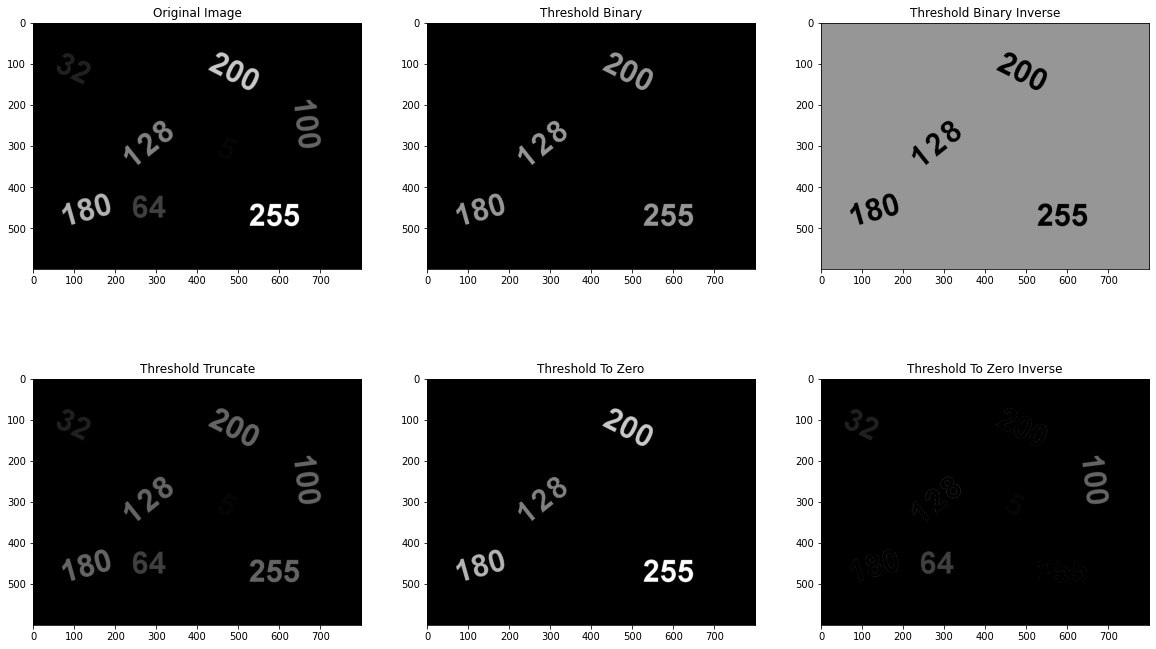

In [ ]:
print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");

## <font style="color:rgb(50,120,229)">Thresholding in the presence of Noise</font>
There are two more methods in OpenCV which handle the presence of Noise while doing thresholding. They are :
1. Adaptive Thresholding
1. Otsu's Thresholding

We will cover these techniques in the upcoming weeks as you need to understand a few other concepts ( like Histograms, Image Noise and Blurring ) in order to understand the unique aspects of Otsu's Thresholding. 

If you already know about the above mentioned concepts and want to learn about these thresholding technques, [please go through this tutorial](https://docs.opencv.org/4.1.0/d7/d4d/tutorial_py_thresholding.html).


# <font style="color:rgb(50,120,229)">Morphological Operations</font>


**Dilation** is used to merge or expand white regions which may be close to each other and 

**Erosion** is used to separate or shrink white regions

In this section, we will discuss how to use dilate and erode operations available in OpenCV and in the next section, we will see what is going on under the hood of these operations and how to implement them on your own. 

# <font style="color:rgb(50,120,229)">Dilation and Erosion in OpenCV</font>

Dilation and Erosion  operations are achieved by using  [**`dilate`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) and [**`erode`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) functions of OpenCV. Given below are the function descriptions.

## <font style="color:rgb(50,120,229)">Dilation</font>

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv.dilate(	src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)
```


## <font style="color:rgb(50,120,229)">Erosion</font>

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv.erode(	src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)
```

**Parameters**

Both functions take the same set of arguments

- **`src`**	input image; the number of channels can be arbitrary, but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`kernel`**	structuring element used for dilation; if elemenat=Mat(), a 3 x 3 rectangular structuring element is used.
- **`anchor`**	position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.
- **`iterations`**	number of times dilation is applied.
- **`borderType`**	pixel extrapolation method.
- **`borderValue`**	border value in case of a constant border

**<font style="color:rgb(255,0,0)">Note:</font>** In the functions above, the parameter ‘iterations’ is optional and if not mentioned default is taken as 1. In case, we need to run the dilate/erode function n number of times we specify  "iterations = n"  in the function parameter list.

# <font style="color:rgb(50,120,229)">Load the image</font>

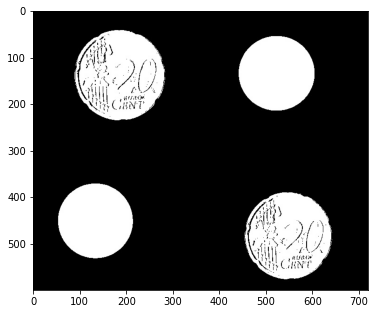

In [ ]:
imageName = DATA_PATH + "images/dilation_example.jpg"

# Read the input image
image = cv2.imread(imageName)

# Check for an invalid input
if image is None:  
    print("Could not open or find the image")
plt.imshow(image)

In case you are wondering, the above is a binary image of 4 coins. We can see that there are some black spots in the coins, which can be an issue if we want to create an algorithm to detect coins automatically. Thus, we want to remove those white spots so that the final image consists of only 4 white blobs.

As we have seen previously, Dilation operation can be used to grow the white region in an image. This example becomes a perfect candidate for applying dilation and get a better image for further processing.

We will use this to illustrate the dilation operation.


# <font style="color:rgb(50,120,229)">Code for Dilation Operation </font>
We will check out two ways of performing dilation. 

1. Using a single big kernel
1. Using multiple iterations of a smaller kernel

## <font style="color:rgb(50,120,229)">Dilation using a single big kernel </font>

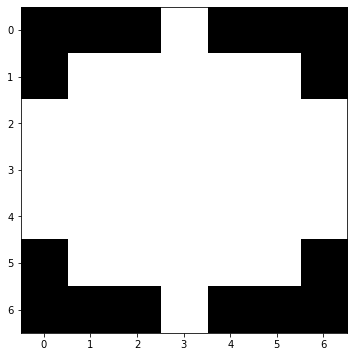

In [ ]:
# Get structuring element/kernel which will be used for dilation
kSize = (7,7)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)
plt.imshow(kernel1)

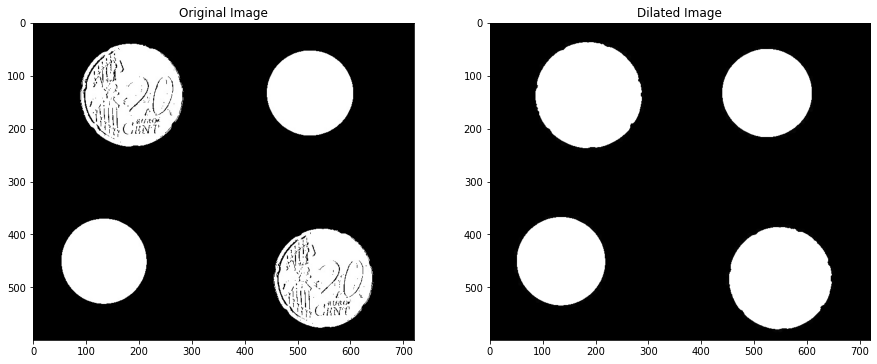

In [ ]:
# Apply dilate function on the input image
imageDilated = cv2.dilate(image, kernel1)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageDilated);plt.title("Dilated Image");

## <font style="color:rgb(50,120,229)">Dilation using smaller kernel with multiple iterations </font>

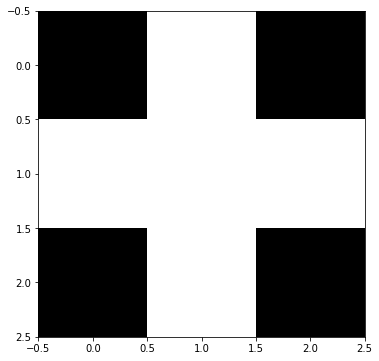

In [ ]:
# Get structuring element/kernel which will be used for dilation
kSize = (3,3)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)
plt.imshow(kernel2)

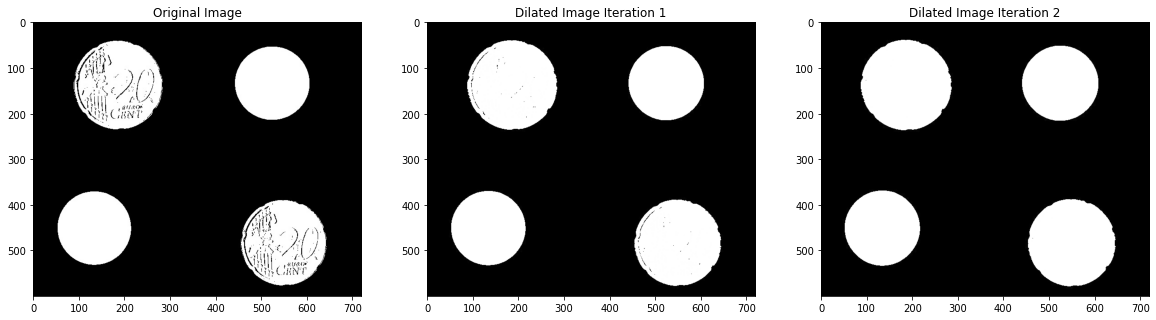

In [ ]:
# Apply dilate function on the input image
imageDilated1 = cv2.dilate(image, kernel2, iterations=1)
imageDilated2 = cv2.dilate(image, kernel2, iterations=2)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image);plt.title("Original Image")
plt.subplot(132);plt.imshow(imageDilated1);plt.title("Dilated Image Iteration 1");
plt.subplot(133);plt.imshow(imageDilated2);plt.title("Dilated Image Iteration 2");

# <font style="color:rgb(50,120,229)">Code for Erosion Operation</font>

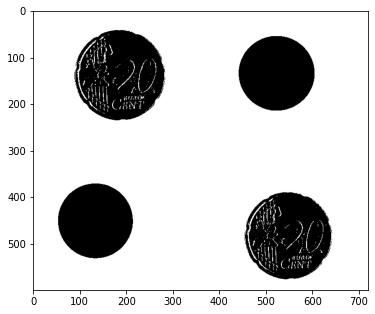

In [ ]:
# Image taken as input
imageName = DATA_PATH + "images/erosion_example.jpg"
image = cv2.imread(imageName, cv2.IMREAD_COLOR)
# Check for invalid input
if image is None:
    print("Could not open or find the image")
plt.imshow(image)

The above image is just the inverted version of the previous image. We can see there are white spots in the 2 coins, which we want to get rid of and make the coins fully black so that further analysis becomes easy.

As we have seen previously, Erosion operation can be used to grow the black region in an image. We will use this to illustrate the erosion operation.

Similar to dilation, you can use any of the 2 methods for erosion. Given below is the code for using a single kernel. You should try to write the code for erosion using multiple iterations and see how the output varies.

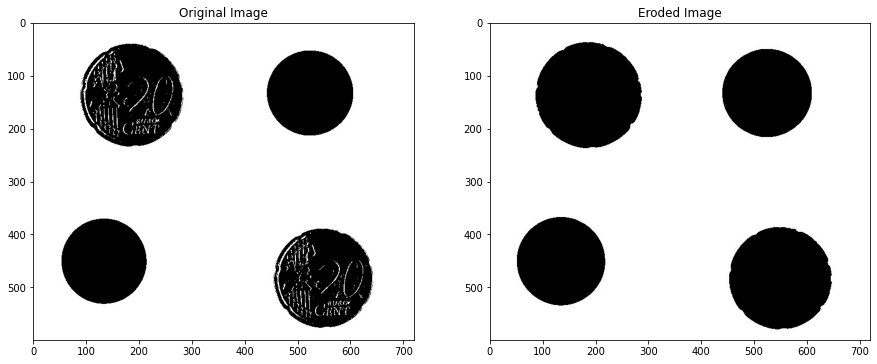

In [ ]:
# Eroding the image , decreases brightness of image
imageEroded = cv2.erode(image, kernel1)

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageEroded);plt.title("Eroded Image");

# <font style = "color:rgb(50,120,229)">Implementation of Morphological Operations</font>
We had discussed how to use dilation and erosion operations in the previous section. In this section, we will see what is going on under the hood. The most important concept that you need to understand is the Structuring element. We will discuss about the structuring element and how it is used for performing these morphological operations.

# <font style="color:rgb(50,120,229)">What is a Structuring Element? </font>
We had seen in the video that a circular ( a.k.a ellipse ) structuring element was used to perform dilation and erosion operations. Let us discuss a bit more about the structuring element.

Structuring elements ( a.k.a Kernels ) are used to modify the shape of the blobs. These are used to scan the image and modify the pixels on the basis of some rule/algorithm ( which governs whether you are doing Erosion or Dilation or something else )

There are 3 types of structuring elements supported by OpenCV. 
1. Ellipse/Circular shaped
1. Rectangular shaped
1. Cross shaped

For creating structuring elements, OpenCV provides the function [**`cv2.getStructuringElement`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc)

`
element = cv2.getStructuringElement(elementType, kernelSize, anchor)
`

You can also create any other structuring element using numpy arrays. It is simply a matrix.

## <font style="color:rgb(50,120,229)">Method 1</font>
1. Scan the kernel through the image 
1. when you find a white pixel overlapping with the center of the kernel, perform an OR operation of the Kernel and the pixel Neighborhood.

#### <font style = "color:rgb(200,0,0)">We have given sample code which implements this algorithm below </font>

## <font style="color:rgb(50,120,229)">Method 2</font>
1. Scan through the image and superimpose the kernel on the neighborhood of each pixel. 
1. Perform an AND operation of the neighborhood with the kernel.
1. Replace the pixel value with the `maximum` value in the neighborhood given by the kernel. 

This means that you check every pixel and its neighborhood with respect to the kernel and change the pixel to white if any of the pixel in this neighborhood is white. OpenCV implements an optimized version of this method. This will work even if the image is not a binary image.

# <font style="color:rgb(50,120,229)">Create a Demo Image</font>
## <font style="color:rgb(50,120,229)">Create an empty matrix </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


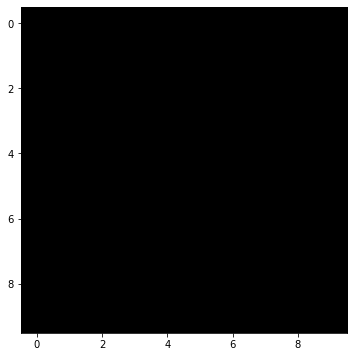

In [ ]:
im = np.zeros((10,10),dtype='uint8')
print(im);
plt.imshow(im)

## <font style="color:rgb(50,120,229)">Lets add some white blobs</font>

We have added the blobs at different places so that all boundary cases are covered in this example.

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


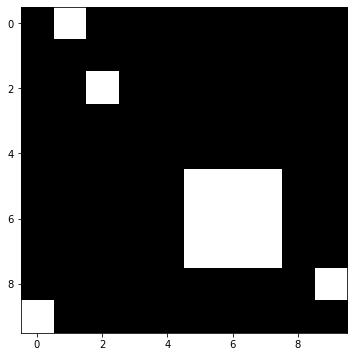

In [ ]:
im[0,1] = 1
im[-1,0]= 1
im[-2,-1]=1
im[2,2] = 1
im[5:8,5:8] = 1

print(im)
plt.imshow(im)

This becomes our demo Image for illustration purpose

## <font style="color:rgb(50,120,229)">Create an Ellipse Structuring Element </font>
Let us create a 3x3 ellipse structuring element.

In [ ]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
print(element)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [ ]:
ksize = element.shape[0]

In [ ]:
height,width = im.shape[:2]

## <font style="color:rgb(50,120,229)">Dilation from scratch : Method 1</font>

White Pixel Found @ 1,2
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


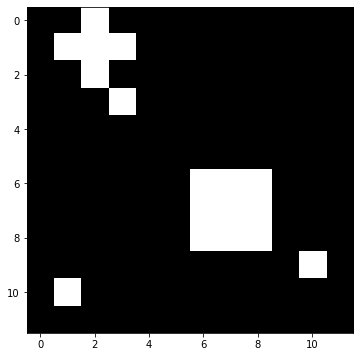

White Pixel Found @ 3,3
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


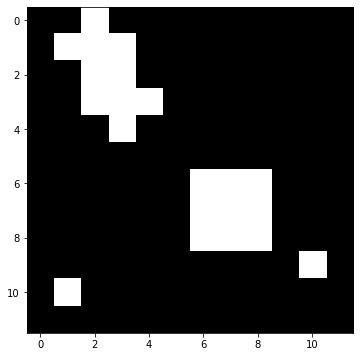

White Pixel Found @ 6,6
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


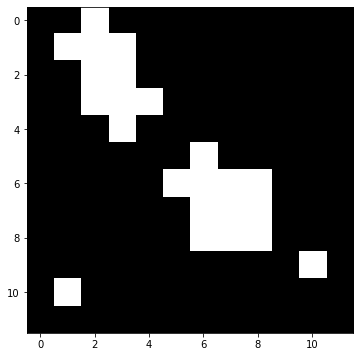

White Pixel Found @ 6,7
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


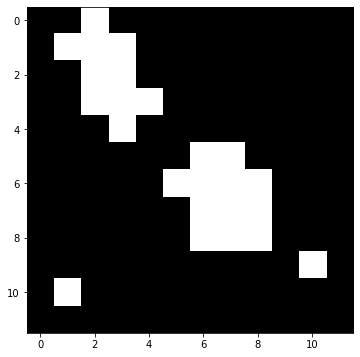

White Pixel Found @ 6,8
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


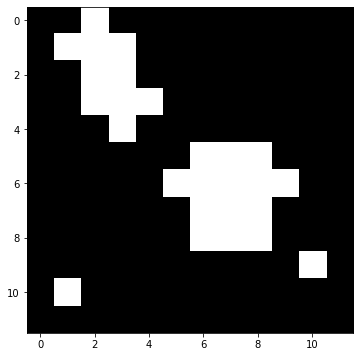

White Pixel Found @ 7,6
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


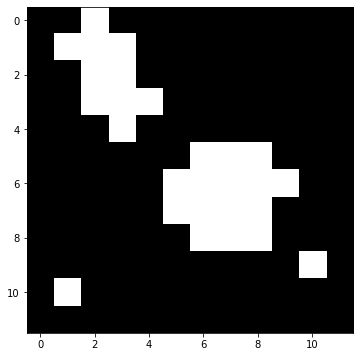

White Pixel Found @ 7,7
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


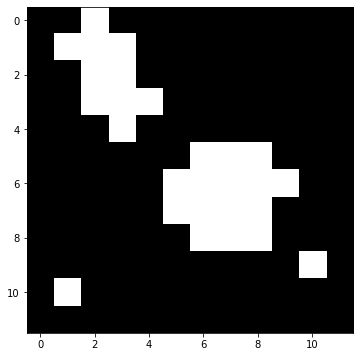

White Pixel Found @ 7,8
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


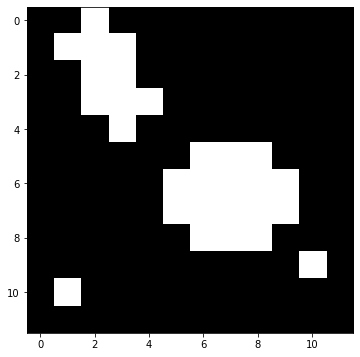

White Pixel Found @ 8,6
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


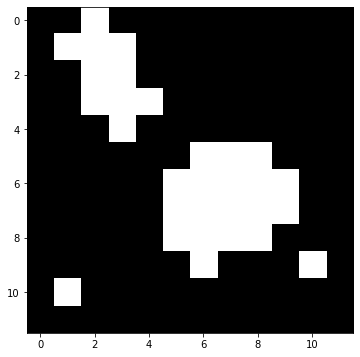

White Pixel Found @ 8,7
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


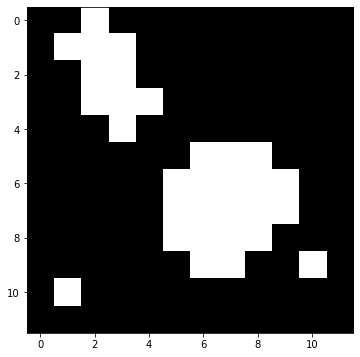

White Pixel Found @ 8,8
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


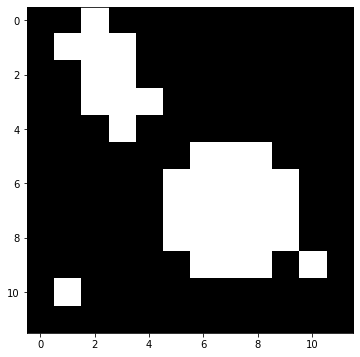

White Pixel Found @ 9,10
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


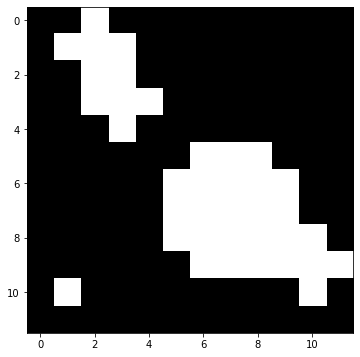

White Pixel Found @ 10,1
[[0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]]


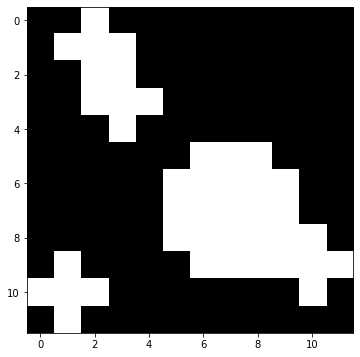

In [ ]:
border = ksize//2
# Create a padded image with zeros padding
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        # When you find a white pixel
        if im[h_i-border,w_i-border]:
            print("White Pixel Found @ {},{}".format(h_i,w_i))
            
            paddedIm[ h_i - border : (h_i + border)+1, w_i - border : (w_i + border)+1] = \
                cv2.bitwise_or(paddedIm[ h_i - border : (h_i + border)+1, w_i - border : (w_i + border)+1],element)
            
            # Print the intermediate result
            print(paddedIm)
            plt.imshow(paddedIm);plt.show()

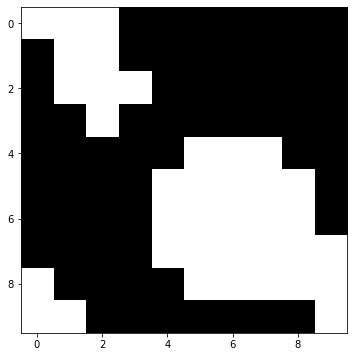

In [ ]:
# Crop out the original dimension from the padded output image
dilatedImage = paddedIm[border:border+height,border:border+width]
plt.imshow(dilatedImage)

## <font style="color:rgb(50,120,229)">Compare using cv2.dilate</font>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


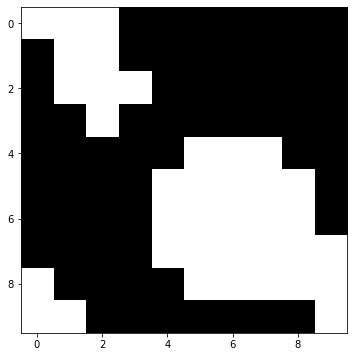

In [ ]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

# <font style="color:rgb(50,120,229)">Opening and Closing</font>
We can combine erosion and dilation operations to perform some interesting operations on binary images. We can remove small black or white spots from a binary image. For example, we know that erosion removes white region and dilation adds white region. Thus, if we want to **remove small white spots**, we should perform **erosion followed by dilation** so that the smaller white spots are removed, whereas the bigger white blobs are unchanged. Similarly you can **remove black spots using dilation followed by erosion**.

Again, weird as it may sound, these operations are also given some names : **Opening and Closing**.

**Opening** refers Erosion followed by Dilation and these operations is used for clearing **white blobs** and 

**Closing** refers Dilation followed by Erosion and are used for clearing **black holes**

In this section, we will discuss how to use opening and closing operations on binary images. 

## <font style="color:rgb(50,120,229)">Opening and Closing using OpenCV</font>

Opening and Closing operations can be performed by combining erosion and dilation. It can also be done using special OpenCV functions

In OpenCV, the opening and closing operations are implemented using **MorphologyEx** function.

To chose between the opening and closing operation to be performed we specify an argument in the function [**`MorphologyEx`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html?fbclid=IwAR1GtoDsIv4Fi8o7vrZ8SGb3bb1uiU_Nyt94fc9J2sHKF7FlbDNT1fq-kI0#ga67493776e3ad1a3df63883829375201f) definition. The argument for opening operation and closing operations are [**`MORPH_OPEN`**] and [**`MORPH_CLOSE`**] respectively.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

### <font style="color:rgb(50,120,229)">Opening</font>

```python:
imageMorphOpened = cv2.morphologyEx( src, cv2.MORPH_OPEN, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]] )
```

### <font style="color:rgb(50,120,229)">Closing</font>

```python:
imageMorphClosed = cv2.morphologyEx( src, cv2.MORPH_CLOSE, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]] )
```

**Parameters**
- **`src`**	Source image. The number of channels can be arbitrary. The depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	Destination image of the same size and type as source image.
- **`op`**	Type of a morphological operation
- **`kernel`**	Structuring element. It can be created using getStructuringElement.
- **`anchor`**	Anchor position with the kernel. Negative values mean that the anchor is at the kernel center.
- **`iterations`**	Number of times erosion and dilation are applied.
- **`borderType`**	Pixel extrapolation method.
- **`borderValue`**	Border value in case of a constant border. The default value has a special meaning.

**<font style="color:rgb(255,0,0)">Note:</font>** In the functions above, the parameter ‘iterations’ is optional and if not mentioned the default value is taken to be 1. In case, we need to run the opening/closing function more than once, we specify the number of iterations in the **MorphologyEx** function call statement.

We will discuss different methods for performing Opening and Closing operations : 
1. Using Dilation and Erosion Operations
1. Using `MorphologyEx` function

## <font style="color:rgb(50,120,229)">Load Image for Opening Operation</font>

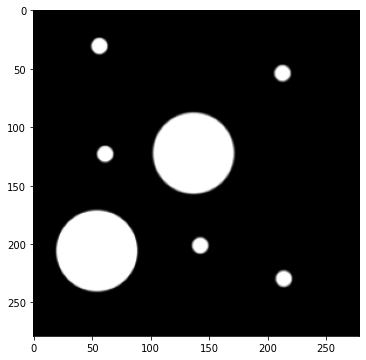

In [ ]:
imageName = DATA_PATH + "images/opening.png"
# Image taken as input
image = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")
plt.imshow(image)

Objective: We want to remove the small white blobs while keeping the the bigger blobs intact

## <font style="color:rgb(50,120,229)">Opening : Method 1 - Using combination of Erosion and Dilation </font>
In this method, we will use a kernel to perform the opening operation by Erosion followed by Dilation. We will use a Ellipse structuring element for the operation.

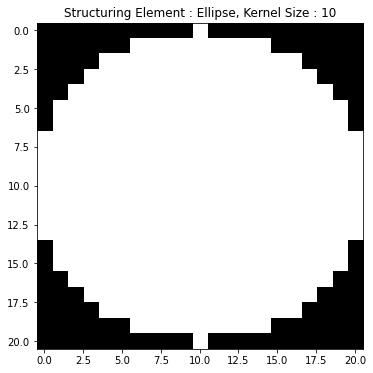

In [ ]:
# Specify Kernel Size
kernelSize = 10

# Create the Kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*kernelSize+1, 2*kernelSize+1),
                                    (kernelSize, kernelSize))

# Perform Erosion
imEroded = cv2.erode(image, element, iterations=1)
# Perform Dilation
imOpen = cv2.dilate(imEroded, element, iterations=1)

# Display Kernel
plt.imshow(element);plt.title("Structuring Element : Ellipse, Kernel Size : {}".format(kernelSize));plt.show()

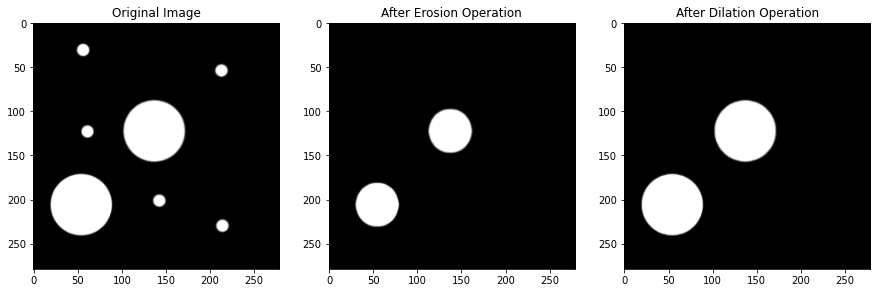

In [ ]:
# Display Output
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image);plt.title("Original Image")
plt.subplot(132);plt.imshow(imEroded,cmap='gray');plt.title("After Erosion Operation")
plt.subplot(133);plt.imshow(imOpen,cmap='gray');plt.title("After Dilation Operation");

We can see that all the small blobs are removed and the bigger blobs remain same.

## <font style="color:rgb(50,120,229)">Opening : Method 2 - Using MorphologyEx function </font>

In [ ]:
# Get structuring element/kernel which will be used 
# for opening operation
openingSize = 3

# Selecting a elliptical kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, 
            (2 * openingSize + 1, 2 * openingSize + 1),
            (openingSize,openingSize))

Applying erosion followed by dilation on image by using morphologyEx function and specifying MORPH_OPEN tag(denotes opening operation). In some cases, it may be required to implement a particular morphological operation more than once. In those cases, we need to define the number of iterations required.

Text(0.5, 1.0, 'After Opening Operation')

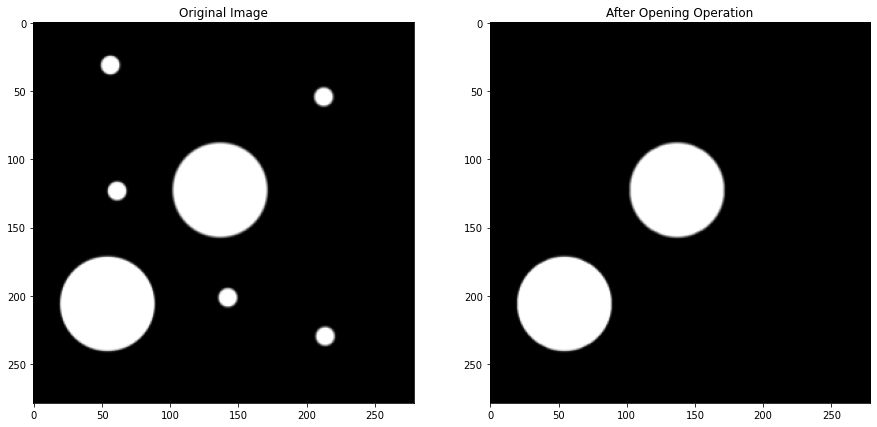

In [ ]:
imageMorphOpened = cv2.morphologyEx(image, cv2.MORPH_OPEN, 
                        element,iterations=3)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageMorphOpened);plt.title("After Opening Operation")

## <font style="color:rgb(50,120,229)">Load Image for Closing Operation</font>

In [ ]:
imageName = DATA_PATH + "images/closing.png"
# Image taken as input
image = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

**Objective:** We want to remove the small black spots while keeping the the bigger black hole intact

## <font style="color:rgb(50,120,229)">Closing : Method 1 - Using combination of Dilation and Erosion </font>
In this method, we will use a kernel to perform the opening operation by Dilation followed by Erosion. We will use a Ellipse structuring element for the operation.

In [ ]:
# Specify Kernel Size
kernelSize = 10

# Create Kernel
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*kernelSize+1, 2*kernelSize+1),
                                    (kernelSize, kernelSize))

# Perform Dilation
imDilated = cv2.dilate(image, element)
# Perform Erosion
imClose = cv2.erode(imDilated, element)

Text(0.5, 1.0, 'After Erosion Operation')

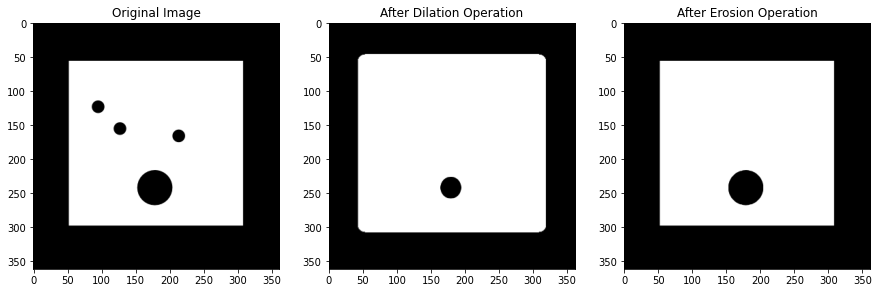

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image);plt.title("Original Image")
plt.subplot(132);plt.imshow(imDilated,cmap='gray');plt.title("After Dilation Operation")
plt.subplot(133);plt.imshow(imClose,cmap='gray');plt.title("After Erosion Operation")

We can see that all the small holes are removed and the bigger holes remain same.

## <font style="color:rgb(50,120,229)">Closing : Method 2 - Using MorphologyEx function </font>

In [ ]:
# Get structuring element/kernel 
# which will be used for closing operation
closingSize = 10

# Selecting an elliptical kernel 
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
            (2 * closingSize + 1, 2 * closingSize + 1),
            (closingSize,closingSize))

Applying dilation followed by closing on image by using morphologyEx function and specifying MORPH_CLOSE tag(denotes closing operation)

Text(0.5, 1.0, 'After Closing Operation')

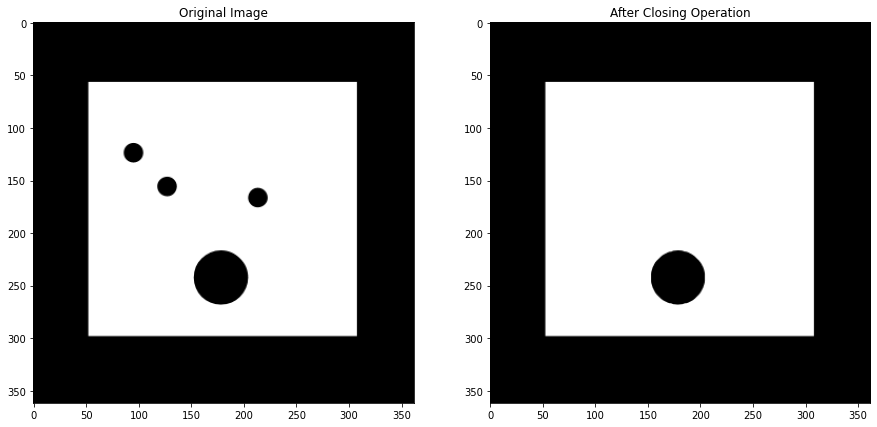

In [ ]:
imageMorphClosed = cv2.morphologyEx(image,
                                    cv2.MORPH_CLOSE, element)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image);plt.title("Original Image")
plt.subplot(122);plt.imshow(imageMorphClosed,cmap='gray');plt.title("After Closing Operation")

# <font style="color:rgb(50,120,229)">Connected Component Analysis</font>
In this section, we will dip our toes into a simple computer vision algorithm called **Connected Component Analysis (CCA)**. It is a fancy name for labeling blobs in a binary image. So, it can also be used to count the number of blobs ( also called connected components ) in a binary image. Lets understand it by way of an example. 


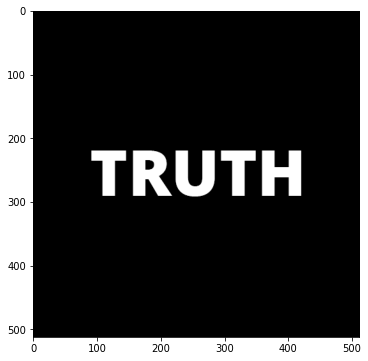

In [ ]:
# Read image as grayscale
im = cv2.imread(DATA_PATH + "images/truth.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im)

In the figure above, we see a binary image with five blobs corresponding to the letters T, R, U, T and H. Connected Component Analysis (CCA) allows us to apply a label to every blob. In other words, CCA will create a mask where all pixels corresponding to the background are 0, all pixels corresponding to the first blob, (i.e. the letter T) are 1, those corresponding to R are 2 and so on and so forth. 

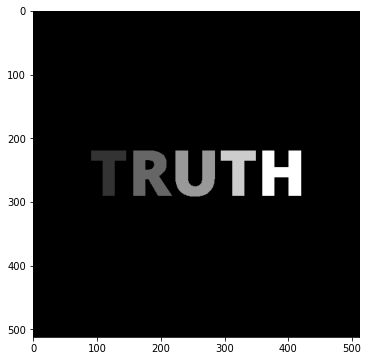

In [ ]:
# Threshold Image
th, imThresh = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)

# Find connected components
_, imLabels = cv2.connectedComponents(imThresh)
plt.imshow(imLabels)

## <font style="color:rgb(50,120,229)">Display each label </font>

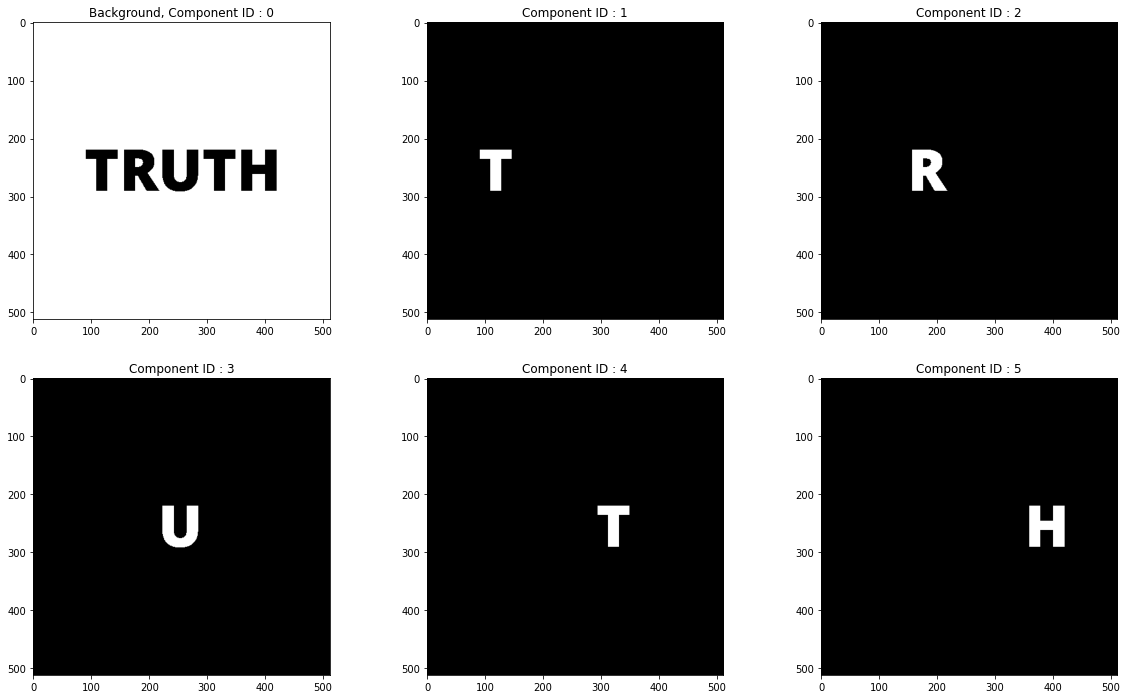

In [ ]:
# Display the labels
nComponents = imLabels.max()

displayRows = np.ceil(nComponents/3.0)
plt.figure(figsize=[20,12])
for i in range(nComponents+1):
    plt.subplot(displayRows,3,i+1)
    plt.imshow(imLabels==i)
    if i == 0:
        plt.title("Background, Component ID : {}".format(i))
    else:
        plt.title("Component ID : {}".format(i))

# <font style="color:rgb(50,120,229)">Color Coding of Components</font>
Since it is a bit difficult to visualize the difference in intensity value in grayscale images, we apply a colormap so that grayscale values are converted to color for the purpose of display.

First, we normalize the image pixel values to 0 to 255. To achieve this we first find the min and max values in the image, and then normalize the image by subtracting the min and dividing by (max - min). This normalizes the image to be between 0 and 1. Finally 255 is multiplied to we get an image with values between 0 and 255. Finally, we apply a colormap on the labelled image.

## <font style="color:rgb(50,120,229)">What is a colormap ?</font>

Let’s say we want to show the temperature in different parts of the United States on a map. We could overlay temperature data on top of a US map as a grayscale image — darker regions representing cooler temperatures, and brighter regions representing hotter regions. Not only is such a representation incredibly boring, it is a bad representation for two big reasons. 
- First, the human visual system is not optimized to measure small changes in grayscale intensities. We are way better at perceiving changes in color. 
- Second, we associate different meanings with different colors. It is much more meaningful to represent cooler temperatures using blue and warmer temperatures using red.

Temperature data is just one example, but there are several other cases where the data is single valued (grayscale), but it makes sense to convert it to color data for visualization. Other examples of data that are better visualized by pseudo-coloring are height, pressure, density, humidity so on and so forth.

OpenCV defines 12 colormaps that can be applied to a grayscale image using the function `applyColorMap` to produce a pseudocolored image. We will use COLORMAP_JET for our example. 


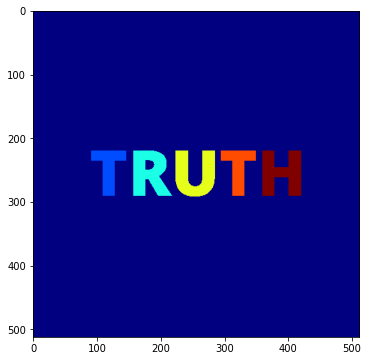

In [ ]:
# The following line finds the min and max pixel values
# and their locations on an image.
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)

# Normalize the image so that the min value is 0 and max value is 255.
imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)

# Convert image to 8-bits unsigned type
imLabels = np.uint8(imLabels)

# Apply a color map
imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
plt.imshow(imColorMap[:,:,::-1])

# <font style="color:rgb(50,120,229)">Contours </font>
Contours are simply the boundaries of an object or part of object in an image. They are useful in shape analysis and object Detection/Recognition using traditional Computer Vision algorithms.

You can do a lot of analysis based on contours to arrive at a solution to many computer vision problems. 

In this Notebook, we will discuss many different aspects of Contour Analysis. Let's get started.

## <font style="color:rgb(50,120,229)">Load an image and display </font>

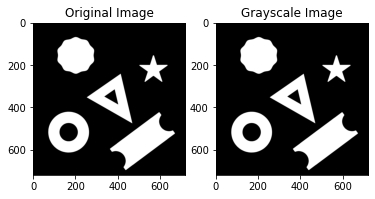

In [ ]:
imagePath = DATA_PATH + "images/Contour.png"
image = cv2.imread(imagePath)
imageCopy = image.copy()
# Convert to grayscale
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


# Display image
plt.figure()
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.title("Original Image");
plt.subplot(122)
plt.imshow(imageGray)
plt.title("Grayscale Image");

# <font style="color:rgb(50,120,229)">How to find Contours</font>
We have seen earlier that there are many algorithms for finding Contours. We will use the OpenCV function [**`findContours`**](https://docs.opencv.org/4.1.0/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) to get the boundaries of the objects displayed above.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
contours, hierarchy	=	cv.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```

Where,


- **`image`**	- input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one. 
- **`contours`** - Detected contours. Each contour is stored as a vector of points.
- **`hierarchy`** - Optional output vector containing information about the image topology. It has been described in detail in the video above.
- **`mode`** - Contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE )
- **`method`** - Contour approximation method. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1 etc )
- **`offset`** - Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

In [ ]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print("Number of contours found = {}".format(len(contours)))
print("\nHierarchy : \n{}".format(hierarchy))

Number of contours found = 7

Hierarchy : 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]


# <font style="color:rgb(50,120,229)">Drawing Contours</font>
Contours are simply an array of pixel locations. Let's draw the contours on the boundary of the objects. 

In [ ]:
# Draw all the contours
cv2.drawContours(image, contours, -1, (0,255,0), 3);

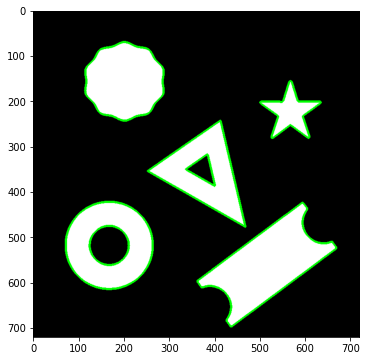

In [ ]:
plt.imshow(image[:,:,::-1])

Note that both the inner and outer contours have been detected.

What if we only want to detect the outer contours? We can use `cv2.RETR_EXTERNAL` mode while calling `cv2.findContours` function.

Number of contours found = 5


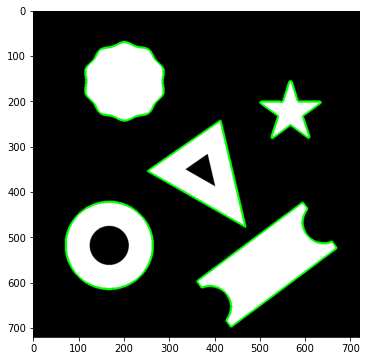

In [ ]:
# Find external contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found = {}".format(len(contours)))
image = imageCopy.copy()
# Draw all the contours
cv2.drawContours(image, contours, -1, (0,255,0), 3);

plt.imshow(image[:,:,::-1])

In [ ]:
# Draw only the 3rd contour
# Note that right now we do not know
# the numbering of contour in terms of the shapes
# present in the figure
image = imageCopy.copy()
cv2.drawContours(image, contours[2], -1, (0,0,255), 3);

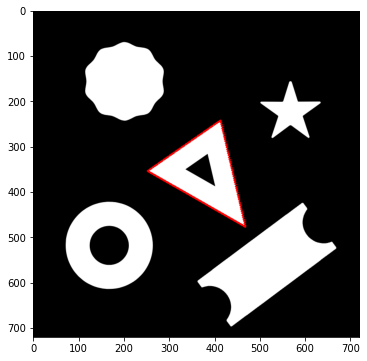

In [ ]:
plt.imshow(image[:,:,::-1])

# <font style="color:rgb(50,120,229)">Contour Properties</font>
Once you have detected the contours from an image, it becomes very easy to do further analysis on the basis of various properties of contours. Let us discuss a few useful properties of contours.

## <font style="color:rgb(50,120,229)">Center of Mass or Centroid</font>
Let us find the center of mass for each contour.

In [ ]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Draw all the contours
cv2.drawContours(image, contours, -1, (0,255,0), 3);

In [ ]:
for cnt in contours:
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(image, (x,y), 10, (255,0,0), -1);

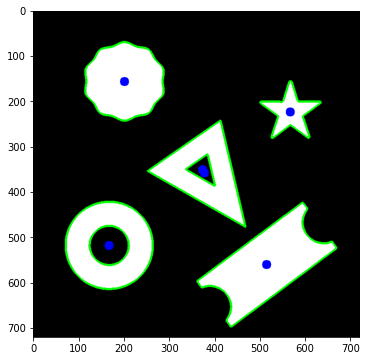

In [ ]:
plt.imshow(image[:,:,::-1])

For some shapes, you can see that multiple points were marked, can you figure out why? Plot contours one by one and see what are the various contours detected.

In [ ]:
for index,cnt in enumerate(contours):
    # We will use the contour moments
    # to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center
    cv2.circle(image, (x,y), 10, (255,0,0), -1);
    
    # Mark the contour number
    cv2.putText(image, "{}".format(index + 1), (x+40, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2);

imageCopy = image.copy()

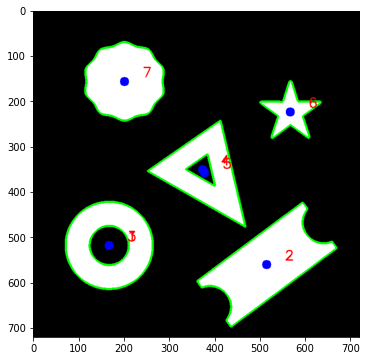

In [ ]:
plt.imshow(image[:,:,::-1])

Note that contours 1, 3 and 4, 5 have centers very close to each other. Note their shapes and see if you can derive any observation.

## <font style="color:rgb(50,120,229)">Area and Perimeter</font>

In [ ]:
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 5797.0 and perimeter = 285.0782080888748
Contour #2 has area = 31898.0 and perimeter = 938.8813602924347
Contour #3 has area = 28977.5 and perimeter = 635.369619846344
Contour #4 has area = 2002.0 and perimeter = 216.4507908821106
Contour #5 has area = 21896.5 and perimeter = 728.707710981369
Contour #6 has area = 6214.5 and perimeter = 525.1442201137543
Contour #7 has area = 22854.0 and perimeter = 579.3279893398285


## <font style="color:rgb(50,120,229)">Bounding Boxes</font>

There are 2 type of bounding boxes we can create around a contour:

1. A vertical rectangle
2. A rotated rectangle - This is the bounding box with the minimum area

In [ ]:
image = imageCopy.copy()
for cnt in contours:
    # Vertical rectangle
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,255), 2)

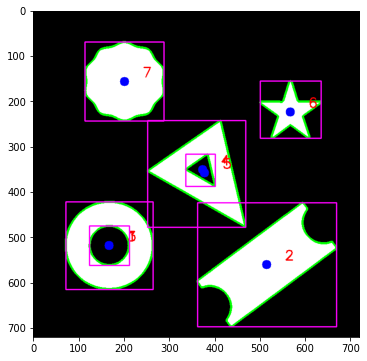

In [ ]:
plt.imshow(image[:,:,::-1])

In [ ]:
image = imageCopy.copy()
for cnt in contours:
    # Rotated bounding box
    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))
    # Use drawContours function to draw 
    # rotated bounding box
    cv2.drawContours(image, [boxPts], -1, (0,255,255), 2)

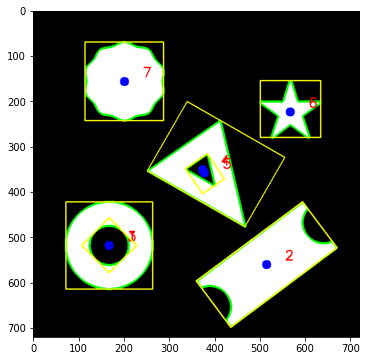

In [ ]:
plt.imshow(image[:,:,::-1])

## <font style="color:rgb(50,120,229)">Fit a circle and ellipse</font>

Fitting a bounding box (vertical or rotated) is the preferred choice in most cases but in cases where you are only dealing with circles or ellipses, fitting a circle and/or an ellipse is a much better choice.

Let's see how we can do it.

In [ ]:
image = imageCopy.copy()
for cnt in contours:
    # Fit a circle
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(image, (int(x),int(y)), int(round(radius)), (125,125,125), 2)

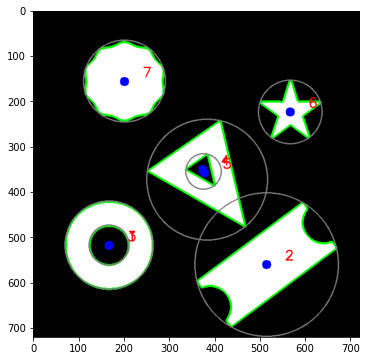

In [ ]:
plt.imshow(image[:,:,::-1])

In [ ]:
image = imageCopy.copy()
for cnt in contours:
    # Fit an ellipse
    # We can fit an ellipse only
    # when our contour has minimum
    # 5 points
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image, ellipse, (255,0,125), 2)

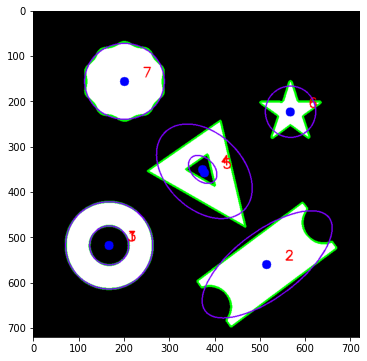

In [ ]:
plt.imshow(image[:,:,::-1])

# <font style="color:rgb(50,120,229)">What is a Blob?</font>

<img src="https://www.learnopencv.com/wp-content/uploads/2015/02/blob_detection.jpg">

A Blob is a group of connected pixels in an image that share some common property ( E.g grayscale value ). In the image above, the dark connected regions are blobs, and the goal of blob detection is to identify and mark these regions.

## <font style="color:rgb(50,120,229)">Simple Blob Detector Example</font>
OpenCV provides a convenient way to detect blobs and filter them based on different characteristics.

In this example, We find the position ( x,y coordinates) of the blob, and the radius of the blob.

In [ ]:
# Read image
im = cv2.imread(DATA_PATH + "images/blob_detection.jpg", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(im)

im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
 
# Mark blobs using image annotation concepts we have studied so far
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(im,(x,y),5,(0,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(im,(x,y),radius,(0,0,255),2)

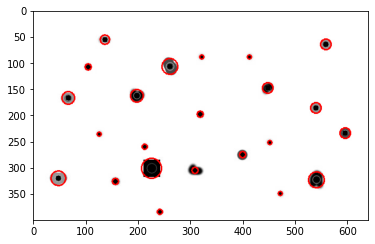

In [ ]:
# Let's see what image we are dealing with
plt.imshow(im[:,:,::-1])

# <font style="color:rgb(50,120,229)">How does Blob detection work ?</font>

SimpleBlobDetector, as the name implies, is based on a rather simple algorithm described below. The algorithm is controlled by parameters ( shown in bold below )  and has the following steps. 

1. **Thresholding** : Convert the source images to several binary images by thresholding the source image with thresholds starting at minThreshold. These thresholds are incremented  by thresholdStep until maxThreshold. So the first threshold is minThreshold, the second is minThreshold + thresholdStep, the third is minThreshold + 2 x thresholdStep, and so on.
2. **Grouping** : In each binary image,  connected white pixels are grouped together.  Let’s call these binary blobs.
3. **Merging**  : The centers of the binary blobs in the binary images are computed, and  blobs located closer than minDistBetweenBlobs are merged.
4. **Center & Radius Calculation** :  The centers and radii of the new merged blobs are computed and returned.

# <font style="color:rgb(50,120,229)">Filtering Blobs by Color, Size and Shape</font>

<img src="https://www.learnopencv.com/wp-content/uploads/2015/02/BlobTest.jpg">

The parameters for SimpleBlobDetector can be set to filter the type of blobs we want.

- **By Color** : First you need to set filterByColor = 1. Set blobColor = 0 to select darker blobs, and blobColor = 255 for lighter blobs. 
- **By Size** :  You can filter the blobs based on size by setting the parameters filterByArea = 1, and appropriate values for minArea and maxArea. E.g. setting minArea = 100 will filter out all the blobs that have less then 100 pixels.
- **By Shape** : Now shape has three different parameters.
- **Circularity** :  This just measures how close to a circle the blob is. E.g. a regular hexagon has higher circularity than say a square. To filter by circularity, set filterByCircularity = 1.  Then set appropriate values for minCircularity and maxCircularity.
 
 $$\text{Circularity} = \frac{4\pi\times \text{Area}}
{(\text{perimeter})^2}$$

    This means that a circle has a circularity of 1, circularity of a square is 0.785, and so on.

- **Convexity** : A picture is worth a thousand words.  Convexity is defined as the (Area of the Blob / Area of it’s convex hull). Now, Convex Hull of a shape is the tightest convex shape that completely encloses the shape.  To filter by convexity, set filterByConvexity = 1, followed by setting 0 ≤ minConvexity ≤ 1 and maxConvexity ( ≤ 1) 
- **Inertia Ratio** : Don’t let this scare you. Mathematicians often use confusing words to describe something very simple. All you have to know is that this measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set 0 ≤ minInertiaRatio ≤ 1 and maxInertiaRatio (≤ 1 ) appropriately.

# <font style="color:rgb(50,120,229)">How to set SimpleBlobDetector params in OpenCV?</font>

Setting parameters for SimpleBlobDetector is easy. Here is an example.

In [ ]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)